In [104]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve

In [105]:
def show(t: list[float], x: list[float], title: str):
    plt.figure(figsize=(8, 4.5), dpi=150)
    plt.title(title)

    plt.xlabel("t")
    plt.ylabel("x(t)")

    plt.plot(t, x, color="blue")

    plt.grid()
    plt.minorticks_on()
    plt.grid(which="minor")

    plt.tight_layout()
    plt.show()

Уравнение Ван-дер-Поля:

$$ \frac{{d^2x}}{{dt^2}} - \epsilon (1 - x^2) \frac{{dx}}{{dt}} + x = 0 $$

Система двух ОДУ первого порядка:

$$ \frac{{dx}}{{dt}} = y $$

$$ \frac{{dy}}{{dt}} = \epsilon (1 - x^2) y - x $$

### Метод Рунге–Кутты

In [106]:
def runge_kutta(h: float, e: float, x0: float, y0: float, t: list[float]) -> tuple:
    lambda_func_x = lambda x, y: y
    lambda_func_y = lambda x, y: e * (1 - x**2) * y - x

    n = int((t[1] - t[0]) / h)
    x, y = [x0], [y0]

    for _ in range(n):
        last_x, last_y = x[-1], y[-1]

        k1 = lambda_func_x(last_x, last_y)
        k2 = lambda_func_x(last_x + h/2, last_y + h * k1/2)
        k3 = lambda_func_x(last_x + h/2, last_y + h * k2/2)
        k4 = lambda_func_x(last_x + h, last_y + h * k3)
        x.append(last_x + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4))

        k1 = lambda_func_y(last_x, last_y)
        k2 = lambda_func_y(last_x + h/2, last_y + h * k1/2)
        k3 = lambda_func_y(last_x + h/2, last_y + h * k2/2)
        k4 = lambda_func_y(last_x + h, last_y + h * k3)
        y.append(last_y + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4))

    time = [i * h for i in range(n + 1)]
    return (time, x)

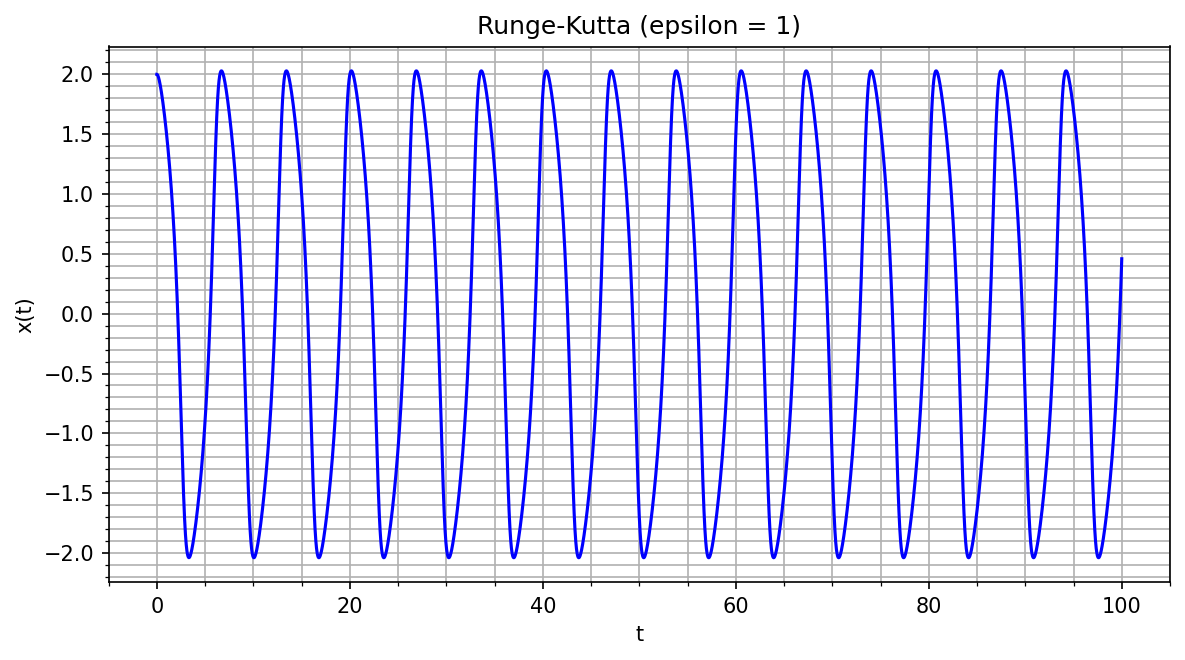

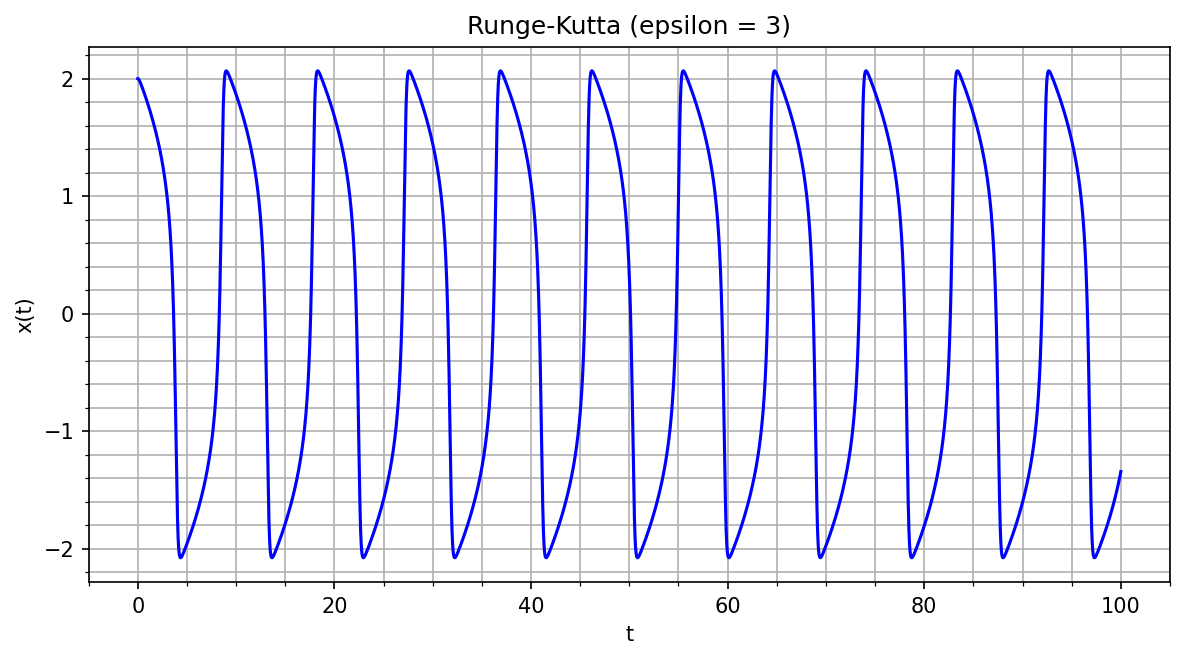

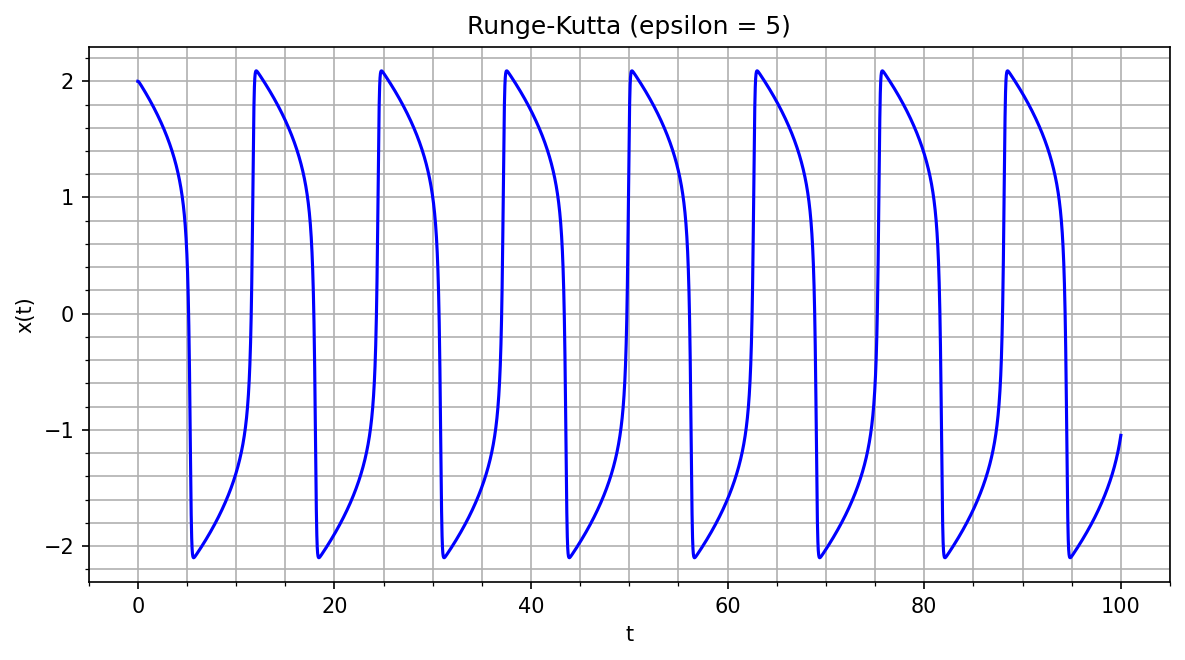

In [112]:
h = 0.01
x0, y0 = 2, 0

for e in [1, 3, 5]:
    time, x = runge_kutta(h=h, e=e, x0=x0, y0=y0, t=[0, 100])
    show(t=time, x=x, title=f"Runge-Kutta (epsilon = {e})")

### Метод Адамса

In [108]:
def adams(h: float, e: float, x0: float, y0: float, t: list[float]) -> tuple:
    lambda_func_x = lambda x, y: y
    lambda_func_y = lambda x, y: e * (1 - x**2) * y - x

    c = [-9, 37, -59, 55]

    n = int((t[1] - t[0]) / h)
    x, y = [x0], [y0]

    # для первых нескольких (трех) значений Метод Рунге–Кутты

    for _ in range(3):
        last_x, last_y = x[-1], y[-1]

        k1 = lambda_func_x(last_x, last_y)
        k2 = lambda_func_x(last_x + h/2, last_y + h * k1/2)
        k3 = lambda_func_x(last_x + h/2, last_y + h * k2/2)
        k4 = lambda_func_x(last_x + h, last_y + h * k3)
        x.append(last_x + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4))

        k1 = lambda_func_y(last_x, last_y)
        k2 = lambda_func_y(last_x + h/2, last_y + h * k1/2)
        k3 = lambda_func_y(last_x + h/2, last_y + h * k2/2)
        k4 = lambda_func_y(last_x + h, last_y + h * k3)
        y.append(last_y + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4))

    # для остальных Метод Адамса

    for _ in range(n - 3):
        last_x, last_y = x[-4:], y[-4:]

        summ = sum([lambda_func_x(last_x[i], last_y[i]) * c[i] for i in range(len(c))])
        x.append(last_x[-1] + h * summ / 24)

        summ = sum([lambda_func_y(last_x[i], last_y[i]) * c[i] for i in range(len(c))])
        y.append(last_y[-1] + h * summ / 24)


    time = [i * h for i in range(n + 1)]
    return (time, x)

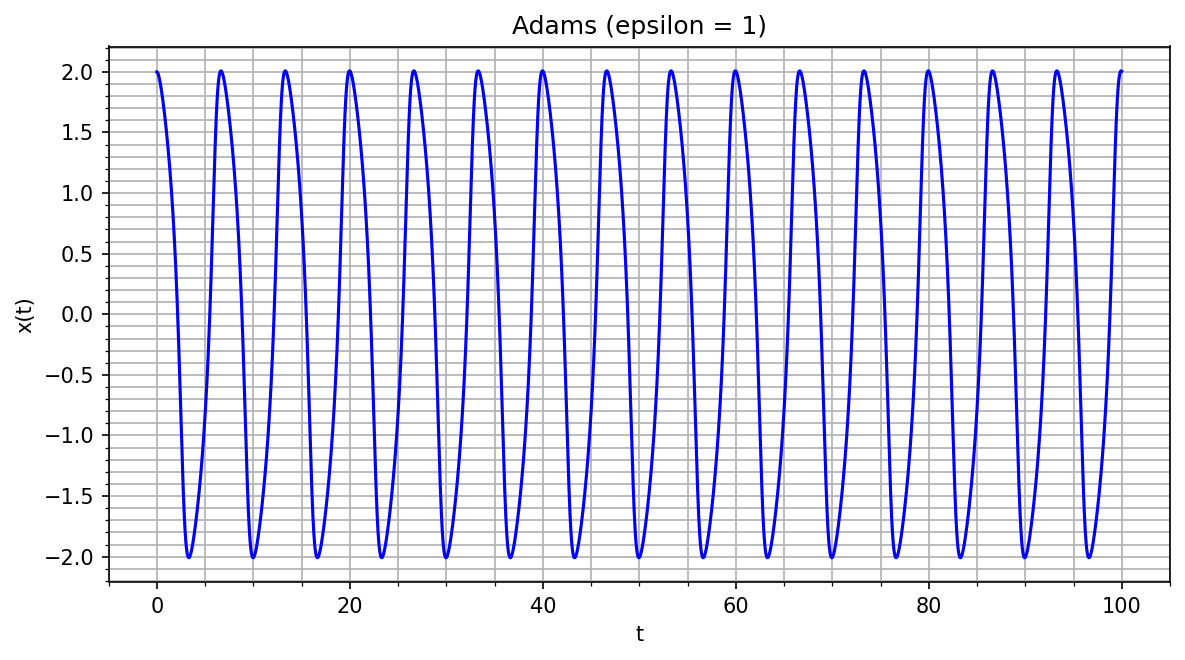

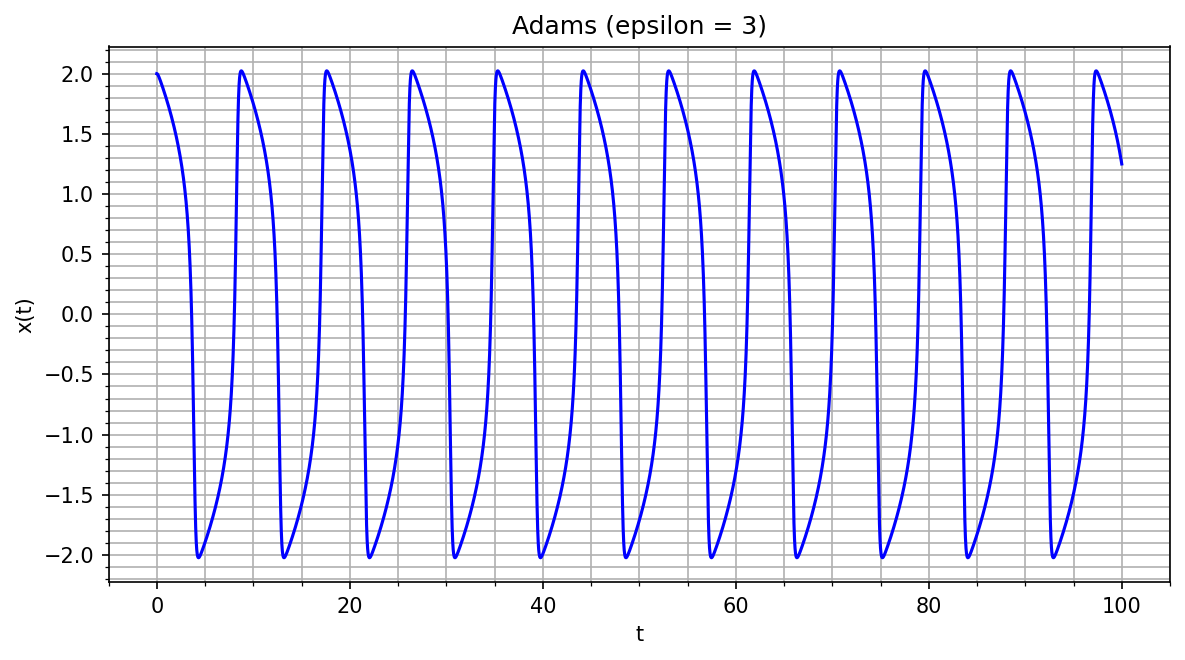

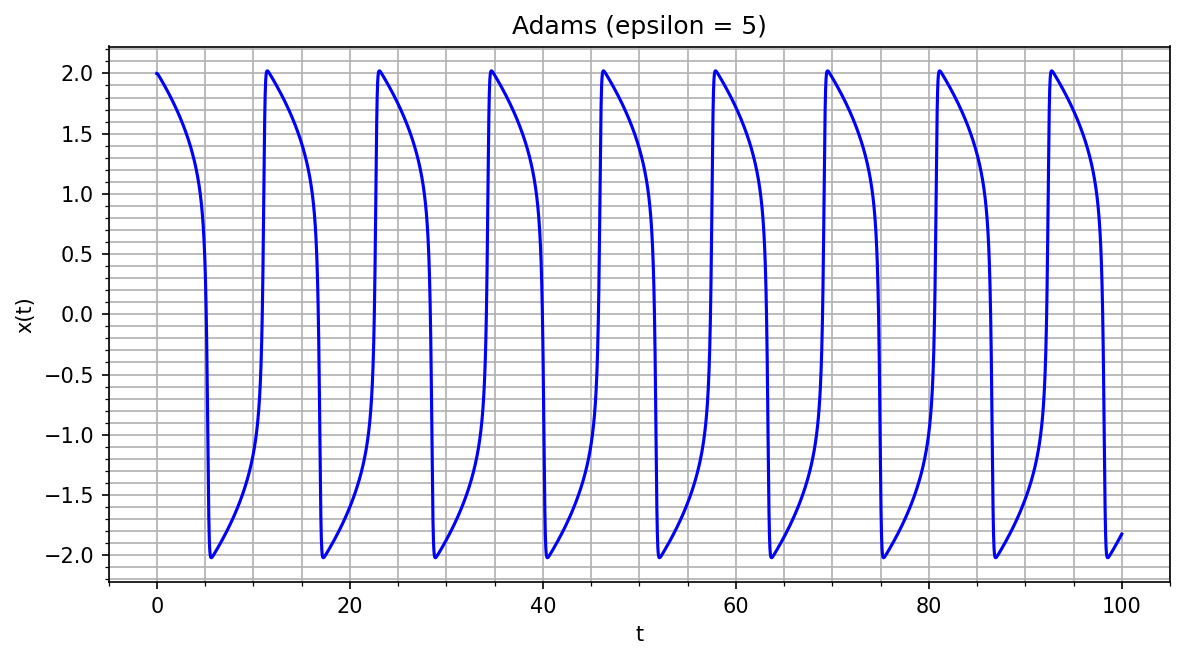

In [119]:
h = 0.01
x0, y0 = 2, 0

for e in [1, 3, 5]:
    time, x = adams(h=h, e=e, x0=x0, y0=y0, t=[0, 100])
    show(t=time, x=x, title=f"Adams (epsilon = {e})")

### Backward differentiation formula (BDF)

In [115]:
def bdf(h: float, e: float, x0: float, t: list[float], N: int=20000) -> tuple:
    lambda_func_x = lambda x, y: y
    lambda_func_y = lambda x, y: e * (1 - x**2) * y - x

    n = int((t[1] - t[0]) / h)
    x, y = [x0], [0]

    # для первых нескольких (трех) значений Метод Рунге–Кутты

    for _ in range(3):
        last_x, last_y = x[-1], y[-1]

        k1 = lambda_func_x(last_x, last_y)
        k2 = lambda_func_x(last_x + h/2, last_y + h * k1/2)
        k3 = lambda_func_x(last_x + h/2, last_y + h * k2/2)
        k4 = lambda_func_x(last_x + h, last_y + h * k3)
        x.append(last_x + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4))

        k1 = lambda_func_y(last_x, last_y)
        k2 = lambda_func_y(last_x + h/2, last_y + h * k1/2)
        k3 = lambda_func_y(last_x + h/2, last_y + h * k2/2)
        k4 = lambda_func_y(last_x + h, last_y + h * k3)
        y.append(last_y + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4))

    # для остальных BDF
    
    func_lambda = lambda x: np.array([x[1], e * (1 - x[0]**2) * x[1] - x[0]])

    time = np.linspace(t[0], t[1], num=N + 1, endpoint=True)
    dt = (t[1] - t[0]) / N

    x_0 = [[x[0], y[0]], [x[0], y[0]], [x[1], y[1]], [x[2], y[2]]]
    
    dim = len(x_0[0])
    x = np.empty(shape=(N + 1, dim))
    x[:4] = x_0
    
    for n in range(N - 3):
        func = lambda x_4: x_4 - (48 * x[n + 3] - 36 * x[n + 2] + 16 * x[n + 1] - 3 * x[n] + 12 * dt * func_lambda(x_4)) / 25
        x[n + 4] = fsolve(func, x[n + 3])

    x = np.delete(x, 1, 1)

    return (time, x)


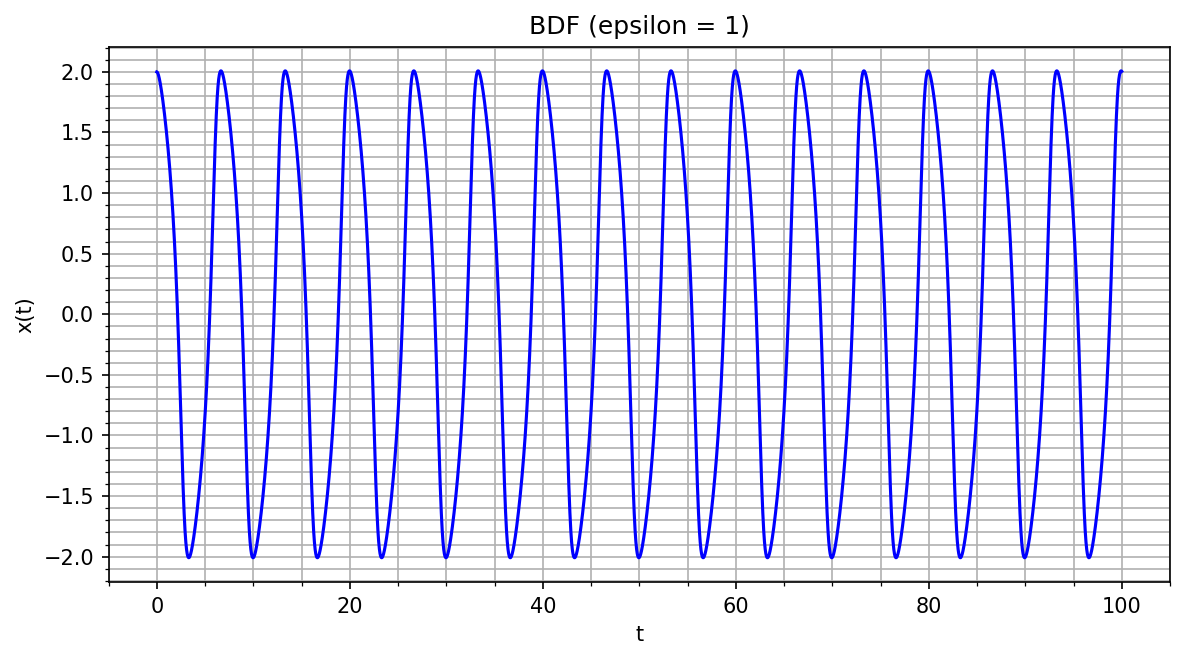

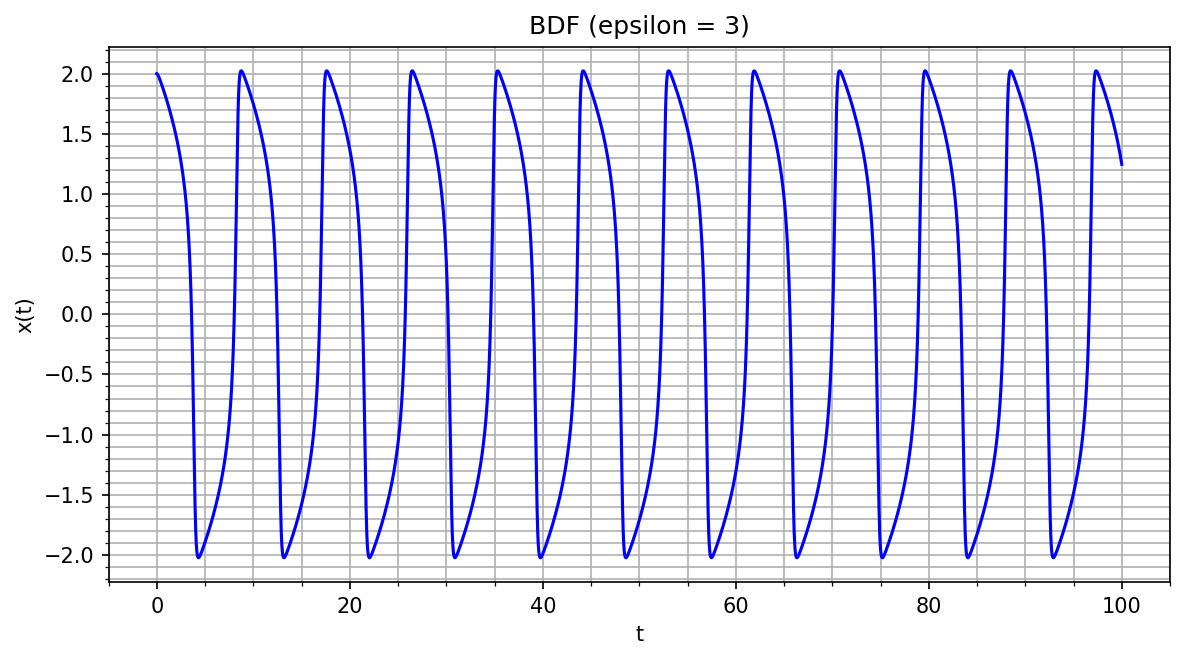

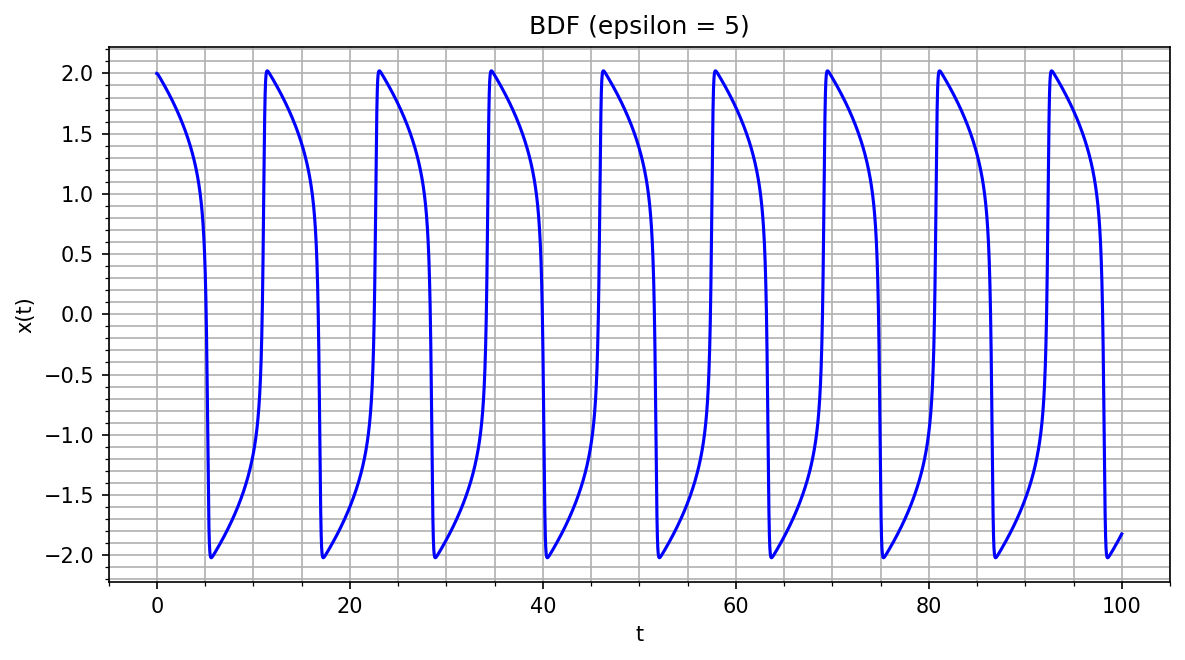

In [117]:
h = 0.01
x0 = 2

for e in [1, 3, 5]:
    time, x = bdf(h=h, e=e, x0=x0, t=[0, 100])
    show(t=time, x=x, title=f"BDF (epsilon = {e})")